# Maps used in "The Elements of Maps" learning module

These are the example of using geospatial data to create maps using [`geopandas`](https://geopandas.org).

In [16]:
import geopandas as gpd
import pandas as pd

zips = gpd.read_file("https://opendata.arcgis.com/api/v3/datasets/b54ec5210cee41c3a884c9086f7af1be_0/downloads/data?format=shp&spatialRefId=4326")
block_groups = gpd.read_file("https://opendata.arcgis.com/datasets/2f982bada233478ea0100528227febce_0.zip")

## Highspeed Trains in Philadelphia

It imports shape files for the City of Philadelphia zip codes, the highspeed rail lines, and the stations for those lines. To run this code, download the `data` file that accompanied this notebook, or download the files [directly from SEPTA](https://septaopendata-septa.opendata.arcgis.com/search?tags=Highspeed).

In [2]:
stations = gpd.read_file("../data/SEPTA_-_Highspeed_Stations")
trains = gpd.read_file("../data/SEPTA_-_Highspeed_Lines")

It then plots the regions, the Broad Street and Market-Frankford lines, and their respective train stations.

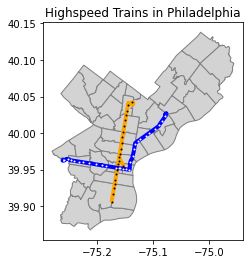

In [3]:
linewidth = 4
markersize = 1

ax = zips.plot(color = "lightgrey", edgecolor='grey', zorder = 1)
ax.set_title("Highspeed Trains in Philadelphia")
ax = trains.loc[trains["Route"] == "Broad Street Line"].plot(color = "orange", linewidth = linewidth, ax = ax, zorder = 2)
ax = trains.loc[trains["Route"] == "Market-Frankford Line"].plot(color = "blue", linewidth = linewidth, ax = ax, zorder = 2)
ax = stations.loc[stations["Route"] == "Broad Street Line"].plot(color = "black",  markersize = markersize, ax = ax, zorder = 3)
ax = stations.loc[stations["Route"] == "Market-Frankford Line"].plot(color = "white",  markersize = markersize, ax = ax, zorder = 3)

ax.figure.savefig("Philadelphia_highspeed_trains.jpg") ## Uncomment this line to save a copy of this map.

To demonstrate a multiline, we look at the Broad Street Line by itself:

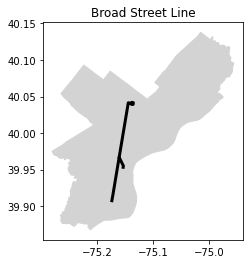

In [4]:
linewidth = 3
markersize = 1

ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("Broad Street Line")
ax = trains.loc[trains["Route"] == "Broad Street Line"].plot(color = "black", linewidth = linewidth, ax = ax, zorder = 2)

ax.figure.savefig("broad_street_line.jpg") ## Uncomment this line to save a copy of this map.

### Labeling the Train Lines

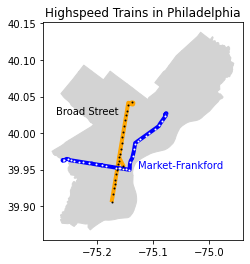

In [5]:
linewidth = 4
markersize = 1

ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("Highspeed Trains in Philadelphia")
ax = trains.loc[trains["Route"] == "Broad Street Line"].plot(color = "orange", linewidth = linewidth, ax = ax, zorder = 2)
ax = trains.loc[trains["Route"] == "Market-Frankford Line"].plot(color = "blue", linewidth = linewidth, ax = ax, zorder = 2)
ax = stations.loc[stations["Route"] == "Broad Street Line"].plot(color = "black",  markersize = markersize, ax = ax, zorder = 3)
ax = stations.loc[stations["Route"] == "Market-Frankford Line"].plot(color = "white",  markersize = markersize, ax = ax, zorder = 3)

BLS = trains.loc[0,"geometry"].representative_point().coords[:][0]
MFL = trains.loc[1,"geometry"].representative_point().coords[:][0]
ax.annotate(text="Broad Street"
            ,xy= BLS
            ,xytext = (-65, 35)
            ,textcoords='offset points'
           , color = "black") 
ax.annotate(text="Market-Frankford"
            ,xy= MFL
          , xytext = (20,0)
            ,textcoords='offset points'
           , color = "blue") 
ax

ax.figure.savefig("Philadelphia_highspeed_trains_labeled.jpg") ## Uncomment this line to save a copy of this map.

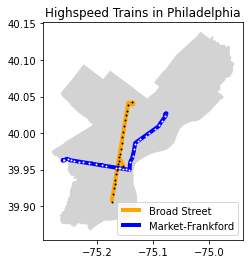

In [6]:
linewidth = 4
markersize = 1

ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("Highspeed Trains in Philadelphia")
ax = trains.loc[trains["Route"] == "Broad Street Line"].plot(color = "orange", linewidth = linewidth, ax = ax, zorder = 2, label = "Broad Street")
ax = trains.loc[trains["Route"] == "Market-Frankford Line"].plot(color = "blue", linewidth = linewidth, ax = ax, zorder = 2, label = "Market-Frankford")
ax = stations.loc[stations["Route"] == "Broad Street Line"].plot(color = "black",  markersize = markersize, ax = ax, zorder = 3)
ax = stations.loc[stations["Route"] == "Market-Frankford Line"].plot(color = "white",  markersize = markersize, ax = ax, zorder = 3)

ax.legend(loc='lower right')

ax.figure.savefig("Philadelphia_highspeed_trains_key.jpg") ## Uncomment this line to save a copy of this map.

### Labeling Zip Codes

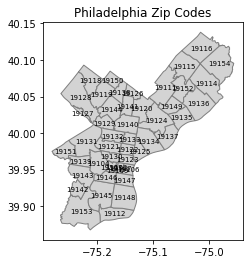

In [7]:
ax = zips.plot(color = "lightgrey", edgecolor='grey', zorder = 1)
ax.set_title("Philadelphia Zip Codes")

for i in zips.index:
    pt = zips.loc[i,"geometry"].centroid.coords[:][0]
    zcode = zips.loc[i,"CODE"]
    ax.annotate(text = zcode
                ,xy = pt
               ,ha = "center"
               ,va = "center"
               , size=7)
ax

ax.figure.savefig("zip_codes.jpg") ## Uncomment this line to save a copy of this map.

## 2019 Vehicle Crashes in Philadelphia


The next few maps use data on vehicle crashes in the city of Philadelphia. Since the dataset we are pulling from contians several years, we filter it to the year we care about. 

In [8]:
crashes = gpd.read_file("https://opendata.arcgis.com/api/v3/datasets/e703eb63ec484aa6beae1268372efa53_0/downloads/data?format=geojson&spatialRefId=4326")
crashes_2019 = crashes.loc[crashes["CRASH_YEAR"] == 2019].copy()

### Dot Distribution

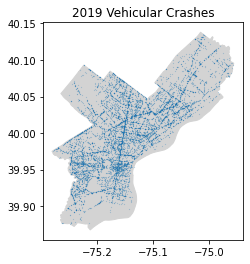

In [9]:
ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("2019 Vehicular Crashes")
ax = crashes_2019.plot(ax = ax, markersize = .01)

ax.figure.savefig("2019_crashes.jpg") ## Uncomment this line to save a copy of this map.

### Heat Map

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap


m = folium.Map(location=[40, -75.15],
               tiles=None,#"Stamen Terrain",
               zoom_start=10,
               zoom_control=False,
               scrollWheelZoom=False,
               dragging=True)

heat_data = [[row['DEC_LAT'],row['DEC_LONG']] for index, row in crashes.iterrows()]



for _, r in zips.iterrows():
    # Without simplifying the representation of each region,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {
                               'fillColor': 'orange',  
                               'weight': 1 , 
                               'color' :'black'})
    geo_j.add_to(m)

HeatMap(heat_data, radius = 12).add_to(m)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>2019 Vehicle Crashes</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m

m.save("2019_crashes_heat_map.html") ## Uncomment this line to save a copy of this map.

## 2021 Pedestrian Stops

This dataset includes each time a vehicle or pedestrian were stopped by the police in 2021. We filter for only those stops that were of pedestrians, and also filter out a number of unreasonable data points in which the location is recorded in Cape Canaveral, Florida.


In [12]:
data = pd.read_csv("https://phl.carto.com/api/v2/sql?filename=car_ped_stops&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20car_ped_stops%20WHERE%20datetimeoccur%20%3E=%20%272021-01-01%27")
stops = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.point_x, data.point_y))
stops = stops.loc[stops.point_x > -76].loc[stops.stoptype == "pedestrian"].copy()

### Choropleth

To create a choropleth map, we first need to determine the number of pedestrian stops in each zip code.

In [23]:
zips["pedestrian_stops"] = 0

for group in zips.index:
    polygon = zips.loc[group,"geometry"]
    zips.loc[group,"pedestrian_stops"] = sum(stops.within(polygon))

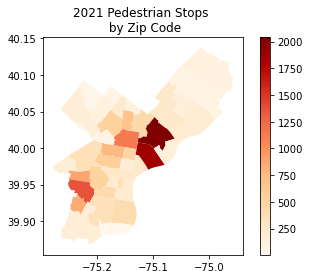

In [24]:
ax = zips.plot("pedestrian_stops"
                       , legend = True,cmap='OrRd'
                      )
ax.set_title("2021 Pedestrian Stops \n by Zip Code")

ax.figure.savefig("2021_pedestrian_stops.jpg") ## Uncomment this line to save a copy of this map.

We could also make a similar map, partitioning the city of Philadelphia into US Census block groups (2010 boundaries).

In [25]:
block_groups["pedestrian_stops"] = 0

for group in block_groups.index:
    polygon = block_groups.loc[group,"geometry"]
    block_groups.loc[group,"pedestrian_stops"] = sum(stops.within(polygon))

<AxesSubplot:title={'center':'2021 Pedestrian Stops \n by Block Group'}>

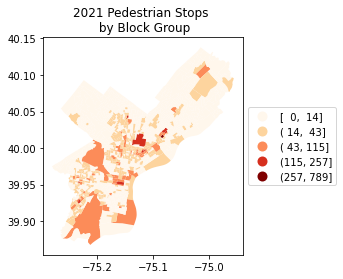

In [26]:
ax = block_groups.plot("pedestrian_stops"
                       , legend = True
                       ,cmap='OrRd'
                       , scheme='natural_breaks'
                       , k=5
                       ,legend_kwds={'loc': 'center left'
                                     , 'bbox_to_anchor':(1,0.5)
                                     , 'fmt':"{:.0f}"
                                     , 'interval': True
                                    }
                                               )
ax.set_title("2021 Pedestrian Stops \n by Block Group")

ax

### Proportional Symbol Map

In both this map and the next, a warning appears about using the centroid of a region without re-projecting the geometry first. For the moment we will ignore this warning since we are not using the location of the centroid for any measurments, only as a convenient location for the dot symbols. 

/var/folders/fd/3j6j5h416k33m_yznzd4sct1smf4t4/T/ipykernel_37188/1775199829.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zips.centroid.plot(ax = ax


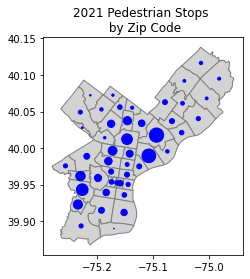

In [34]:
ax = zips.plot(color = "lightgrey", edgecolor='grey', zorder = 1)
ax.set_title("2021 Pedestrian Stops \n by Zip Code")
zips.centroid.plot(ax = ax
                   , color = "blue"
                   , markersize = .1*zips.pedestrian_stops 
                  )

ax.figure.savefig("2021_pedestrian_stops_proportional_symbol.jpg") ## Uncomment this line to save a copy of this map.

### Graduated Symbol Map

In [35]:
import numpy as np

zips["grad_ped_stops"] = np.floor(zips.pedestrian_stops/200)

/var/folders/fd/3j6j5h416k33m_yznzd4sct1smf4t4/T/ipykernel_37188/1201701703.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zips.centroid.plot(ax = ax


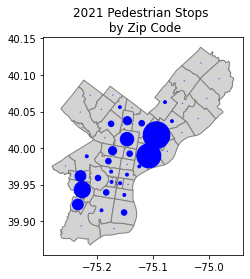

In [36]:
ax = zips.plot(color = "lightgrey", edgecolor='grey', zorder = 1)
ax.set_title("2021 Pedestrian Stops \n by Zip Code")
zips.centroid.plot(ax = ax
                   , color = "blue"
                   , markersize = (zips.grad_ped_stops+.1)**2*7 
                  )

ax.figure.savefig("2021_pedestrian_stops_graduated_symbol.jpg") ## Uncomment this line to save a copy of this map.

### Using symbols to differentiate data points

This map distinguishes between pedestrian and bicyclist deaths in 2019 vehicular crashes that resulted in deaths of pedestrians or bicyclists. 

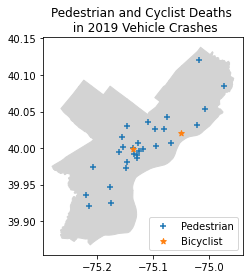

In [37]:
ped_deaths = crashes_2019.loc[(crashes_2019["PED_DEATH_"] > 0)].copy()
bike_deaths = crashes_2019.loc[(crashes_2019["BICYCLE_DE"] > 0)].copy()
markersize = 35

ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("Pedestrian and Cyclist Deaths \n in 2019 Vehicle Crashes")
ax = ped_deaths.plot(ax = ax, markersize = markersize-5, marker = "+", label = "Pedestrian")
ax = bike_deaths.plot(ax = ax, markersize = markersize, marker = "*", label = "Bicyclist")

ax.legend(loc='lower right')

ax.figure.savefig("ped_v_bike_deaths2019.jpg") ## Uncomment this line to save a copy of this map.

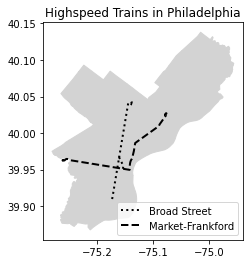

In [38]:
linewidth = 2
markersize = 1

ax = zips.plot(color = "lightgrey", edgecolor='lightgrey', zorder = 1)
ax.set_title("Highspeed Trains in Philadelphia")
ax = trains.loc[trains["Route"] == "Broad Street Line"].plot(color = "black", linewidth = linewidth, linestyle = "dotted", ax = ax, zorder = 2, label = "Broad Street")
ax = trains.loc[trains["Route"] == "Market-Frankford Line"].plot(color = "black", linewidth = linewidth, linestyle = "dashed", ax = ax, zorder = 2, label = "Market-Frankford")

ax.legend(loc='lower right')

ax.figure.savefig("Philadelphia_highspeed_trains_linestyle.jpg") ## Uncomment this line to save a copy of this map.

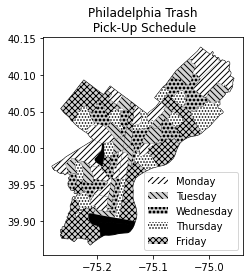

In [39]:
from matplotlib.patches import Patch

trash_day = gpd.read_file("https://opendata.arcgis.com/api/v3/datasets/9d5b4ec9b7a8498faa9a78ecbf6d9b32_0/downloads/data?format=shp&spatialRefId=4326")
ax = zips.plot(color = "black", edgecolor='black', zorder = 0)
ax = trash_day.loc[trash_day["COLLDAY"] == "MON"].plot(ax = ax, color = "white", hatch = "////", zorder = 1)
ax = trash_day.loc[trash_day["COLLDAY"] == "TUE"].plot(ax = ax, color = "lightgrey", hatch = "\\\\\\\\", zorder = 1)
ax = trash_day.loc[trash_day["COLLDAY"] == "WED"].plot(ax = ax, color = "lightgrey", hatch = "ooo", zorder = 1)
ax = trash_day.loc[trash_day["COLLDAY"] == "THU"].plot(ax = ax, color = "white", hatch = "....", zorder = 1)
ax = trash_day.loc[trash_day["COLLDAY"] == "FRI"].plot(ax = ax, color = "lightgrey", hatch = "xxxx", zorder = 1)

ax.set_title("Philadelphia Trash\n Pick-Up Schedule")


legend_elements = [Patch(facecolor='white', hatch = "////",
                         label='Monday'),
                  Patch(facecolor='lightgrey', hatch = "\\\\\\\\",
                         label='Tuesday'),
                  Patch(facecolor='lightgrey', hatch = "ooo",
                         label='Wednesday'),
                  Patch(facecolor='white', hatch = "....",
                         label='Thursday'),
                  Patch(facecolor='lightgrey', hatch = "xxxx",
                         label='Friday')]

ax.legend(handles=legend_elements,loc='lower right')

ax.figure.savefig("Phila_trash_pickup.jpg") ## Uncomment this line to save a copy of this map.